Import the needed libraries.

In [1]:
#testing
import importlib

import sys
import os
#add the projects python files to the path
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), "src"))
#print(sys.path)
#reading the dataset
import etl_data_reader

import PIL
import tensorflow as tf
import numpy as np

#plotting/showing graphics
import matplotlib.pyplot as plt
from IPython.display import Image
#define a font to show japanese characters in matplotlib figures
import matplotlib.font_manager as fm
font = fm.FontProperties(fname=os.path.join("font", "NotoSerifCJKjp-Regular.otf"), size=20)

The [ETL Character data set](http://etlcdb.db.aist.go.jp/) which I am using is a data set with multiple sub sets (ETL1 - ETL7, ETL8B, ETL8G, ETL9B and ETL9G). <br/>
After unpacking the data set I renamed all folders and files to have a uniform naming scheme: "ETLX/ETLX_Y". "X" is the number of the subset and Y the part of the subset. Also ETL7S was removed (ETL7L just smaller), the following renaming was also done: <br/>
ETL8B $\rightarrow$ ETL1, ETL8G $\rightarrow$ ETL9, ETL9B $\rightarrow$ ETL10 and ETL9G $\rightarrow$ ETL11.<br/>
This leads to the following data set structure: <br/> 

| name  |   type  |                    content                       |   res   | Bit depth |    code    | samples each | total samples |
|:-----:|:-------:|:-------------------------------------------------:|:-------:|:---------:|:----------:|:------------:|:-------------:|
| ETL1  | M-Type  | Numbers <br/> Roman <br/> Symbols <br/> Katakana  |  64x63  |     4     | JIS X 0201 |   ~1400      |     141319    |
| ETL2  | K-Type  | Hiragana <br/> Roman <br/> Symbols <br/> Katakana |  60x60  |     6     |    CO59    |     ~24      |      52796    |
| ETL3  | C-Type  | Symbols                                           |  72x76  |     4     | JIS X 0201 |     200      |       9600    |
| ETL4  | C-Type  | Hiragana                                          |  72x76  |     4     | JIS X 0201 |     120      |       6120    |
| ETL5  | C-Type  | Katakana                                          |  72x76  |     4     | JIS X 0201 |    ~200      |      10608    |
| ETL6  | M-Type  | Katakana <br/> Symbols                            |  64x63  |     4     | JIS X 0201 |    1383      |     157662    |
| ETL7  | M-Type  | Hiragana <br/> Symbols                            |  64x63  |     4     | JIS X 0201 |     160      |      16800    |
| ETL8  | 8B-Type | Hiragana <br/> Kanji                              |  64x63  |     1     | JIS X 0208 |     160      |     157662    |
| ETL9  | 8G-Type | Hiragana <br/> Kanji                              | 128x127 |     4     | JIS X 0208 |     200      |     607200    |
| ETL10 | 9B-Type | Hiragana <br/> Kanji                              |  64x63  |     1     | JIS X 0208 |     160      |     152960    |
| ETL11 | 9G-Type | Hiragana <br/> Kanji                              | 128x127 |     4     | JIS X 0208 |     200      |     607200    |


Because the provided data set is distributed in a proprietary binary data format and therefore a little hard to handle I create a ```ERL_data_reader```-class.
The specific dataformat is C-struct like for types: M, 8B, 8G, 9B, 9G. But the types C and K have a 6-bit code. All codes can be found on the [official website.](http://etlcdb.db.aist.go.jp/file-formats-and-sample-unpacking-code)
I used the [struct module](https://docs.python.org/3/library/struct.html) and the [bitstring module](https://pypi.org/project/bitstring/) to unpack the binary data. <br/>

First an instance of the ```ERL_data_reader``` -class is needed.

In [2]:
#testing
importlib.reload(etl_data_reader)

reader = etl_data_reader.ETL_data_reader()

Now a whole data set can be read with the method ```ERL_data_reader.read_data_set(path, data_set_name)```.<br/>
Where ```path``` is the path to the data set file and ```dataset_id``` is the identifier of the sub data set (ETL1, ETL2, etc.).


In [1]:
#CAUTION: Loading some data set parts can use a lot of memory (ETL11 ~ 35GB)
#etl_11 = reader.read_dataset_whole(os.path.join(os.path.dirname(os.getcwd()), "dataset", "ETL11"), "ETL11")

pass

Or parts of a data set can be loaded with ```ERL_data_reader.read_dataset_part(path, data_set_name)```. <br/>
I will load the first part of all eleven data sets.

In [3]:
data = []

for i in range(1, 12):
    data_set_name = "ETL" + str(i)
    path = os.path.join(os.path.dirname(os.getcwd()), "dataset", data_set_name, data_set_name + "_1")
    print("loading:", path)
    data_set = reader.read_dataset_part(path=path, data_set_name=data_set_name)
    #print(data_set[0])
    data.append(data_set)

loading: e:\projects\DaKanjiRecognizer\dataset\ETL1\ETL1_1
Loading: ETL1_1
loading: e:\projects\DaKanjiRecognizer\dataset\ETL2\ETL2_1
Loading: ETL2_1
loading: e:\projects\DaKanjiRecognizer\dataset\ETL3\ETL3_1
Loading: ETL3_1
loading: e:\projects\DaKanjiRecognizer\dataset\ETL4\ETL4_1
Loading: ETL4_1
loading: e:\projects\DaKanjiRecognizer\dataset\ETL5\ETL5_1
Loading: ETL5_1
loading: e:\projects\DaKanjiRecognizer\dataset\ETL6\ETL6_1
Loading: ETL6_1
loading: e:\projects\DaKanjiRecognizer\dataset\ETL7\ETL7_1
Loading: ETL7_1
loading: e:\projects\DaKanjiRecognizer\dataset\ETL8\ETL8_1
Loading: ETL8_1
loading: e:\projects\DaKanjiRecognizer\dataset\ETL9\ETL9_1
Loading: ETL9_1
loading: e:\projects\DaKanjiRecognizer\dataset\ETL10\ETL10_1
Loading: ETL10_1
loading: e:\projects\DaKanjiRecognizer\dataset\ETL11\ETL11_1
Loading: ETL11_1


After reading all the data sets, display some random samples from each. The title shows the label and the index in the data set.

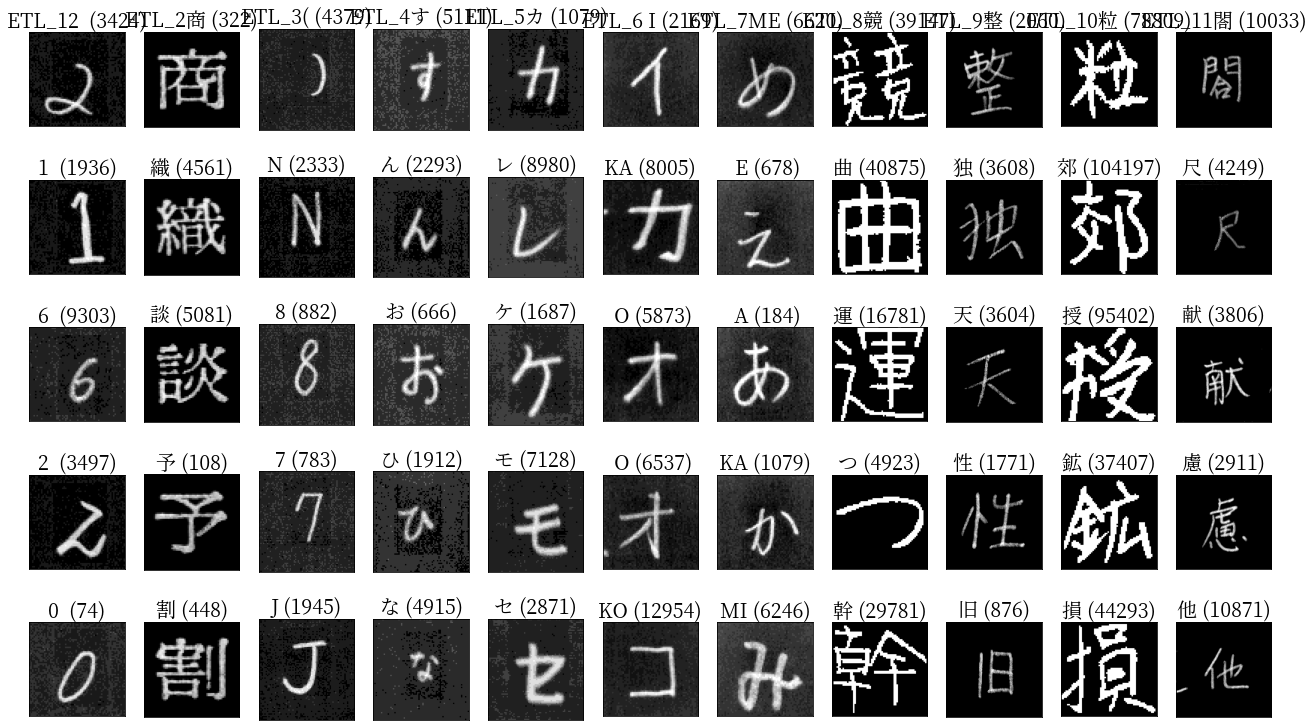

In [4]:
import random

nr_samples_per_data_set = 5
x_length, y_length = len(data), nr_samples_per_data_set

fig, axs = plt.subplots(y_length, x_length)
plt.subplots_adjust(right=3.0, top=2.6)

for x in range(x_length):
    for y in range(y_length):

        rnd = random.randint(0, len(data[x]) - 1)

        #get a random sample
        rand_img = np.array(data[x][rnd][0])
        #setup the sample
        tmp_ax = axs[y, x]
        #put the data set name on top of every column
        title = ("ETL_" + str(x + 1) + "\n") if y == 0 else ""
        title += str(data[x][rnd][1]) + " (" + str(rnd) + ")"
        tmp_ax.set_title(title, font=font)
        tmp_ax.tick_params(axis="both", which="both",
                            bottom=False, top=False, left=False, right=False,
                            labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        #show it
        tmp_ax.imshow(rand_img, cmap="gray")